<a href="https://colab.research.google.com/github/mrh-rakib/AI-cybersec/blob/main/lab_4_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = fetch_california_housing()

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [5]:
# Create a linear regression model and train it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [7]:
# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.5558915986952422


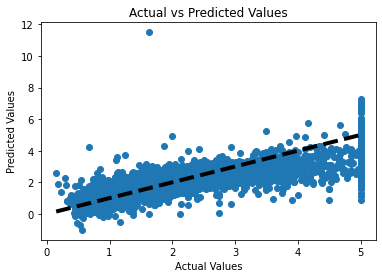

In [ ]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Plot the linear regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

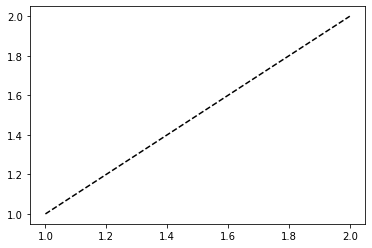

In [ ]:
plt.plot([1,2],[1,2],'k--')

# Support vector regression with GridSearchCV

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
california = fetch_california_housing()
X = california.data
y = california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = SVR()
params = {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1]}
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=3)

In [13]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................C=0.1, kernel=rbf;, score=-1.451 total time=   9.7s
[CV 2/5] END ................C=0.1, kernel=rbf;, score=-1.369 total time=   9.7s
[CV 3/5] END ................C=0.1, kernel=rbf;, score=-1.422 total time=  11.5s
[CV 4/5] END ................C=0.1, kernel=rbf;, score=-1.355 total time=   9.8s
[CV 5/5] END ................C=0.1, kernel=rbf;, score=-1.440 total time=   9.4s
[CV 1/5] END .........C=0.1, kernel=sigmoid;, score=-1102.014 total time=  13.2s
[CV 2/5] END .........C=0.1, kernel=sigmoid;, score=-1050.461 total time=  13.2s
[CV 3/5] END .........C=0.1, kernel=sigmoid;, score=-1047.416 total time=  13.2s
[CV 4/5] END .........C=0.1, kernel=sigmoid;, score=-1079.157 total time=  13.2s
[CV 5/5] END .........C=0.1, kernel=sigmoid;, score=-1170.963 total time=  13.2s
[CV 1/5] END ..................C=1, kernel=rbf;, score=-1.419 total time=   9.6s
[CV 2/5] END ..................C=1, kernel=rbf;, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1], 'kernel': ['rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'C': 1, 'kernel': 'rbf'}


In [15]:
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 1.3320115421348744
RMSE: 1.1541280440812771
MAE: 0.8599506583445761
R^2: -0.01648536010717372
